### Bike Sharing Assignment

OBJECTIVE

Main objective of this assignment is to build a multiple linear regression module to assist the enterprise with demand forecasting, marketing, revenue generation and increase loyality.


### STEPS TO BUILD MULITPLE LINEAR REGRESSION MODEL

1) READ & UNDERSTAND THE DATA PROVIDED
2) VISUALISE THE DATA
3) DATA PREPARATION
4) SPLIT THE DATA INTO TRAINING AND TEST SET
5) BUILD & EVALUATE THE MODEL

In [4277]:
#Import the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4278]:
#Load the dataset into Panda dataframe

data = pd.read_csv('day.csv')

#Display the first 10 rows of the dataset

data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4279]:
#Check the shape of the dataset

data.shape

(730, 16)

In [4280]:
#Examine the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4281]:
#Check null values

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4282]:
#Check the Data Types

data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### dteday has incorrect data type. However, year and month are already derived and there is no use for this column. So no need to set correct data type

In [4284]:
#Check the statistics for numerical varibles

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4285]:
#Check the values of the categorical variables 

data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [4286]:
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [4287]:
data.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [4288]:
data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

### CONCLUSIONS FROM READING THE DATASET PROVIDED

Dataset has 730 Rows and 16 Columns

Dataset has No Null Values

Data has correct Data Types for each column except for dteday. dteday day can be dropped.

instant column can be dropped as it is just an index of the rows

casual and registered columns can be dropped as we are considering cnt as the dependant variable. However, we can still learn information such as brand loyality.

There are categorical variables with numerical representation, namely season, weathersit, weekday, mnth (Month)

Ther are categorical variables with binary representation namely yr, holiday, workingday

## Dataset is clean and some data is already encoded and ready for Linear Regression model. However, we need to transform some categorical variables before building the model.


## STEP 2) Visualising the Data

In [4291]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

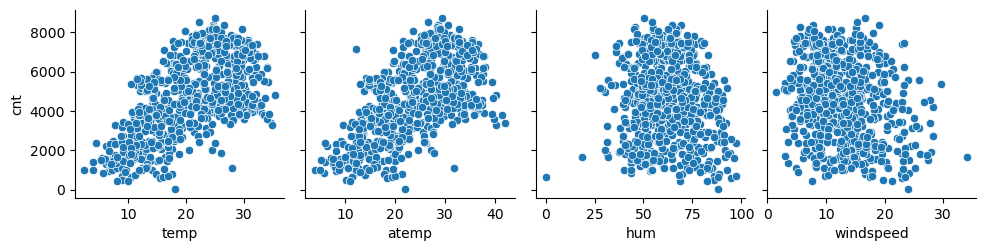

In [4292]:
#Our Target variable for the model is cnt i.e the total number of bike rentals. 
#Lets plot some pair plots to understand the association between predictor and target variables

sns.pairplot(data, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')
plt.show()

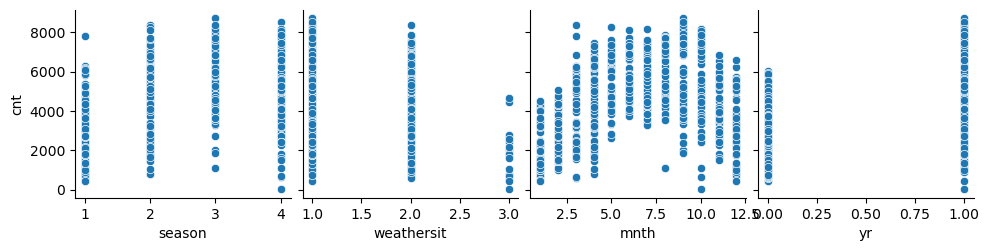

In [4293]:
#Pair plots between categorical predictor variable and the target variable

sns.pairplot(data, x_vars=['season', 'weathersit', 'mnth', 'yr'], y_vars='cnt')
plt.show()

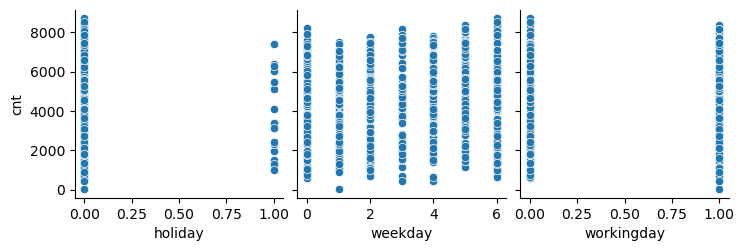

In [4294]:
#Check the association between remaning predictor variables and the target variable

sns.pairplot(data, x_vars=['holiday', 'weekday', 'workingday'], y_vars='cnt')
plt.show()

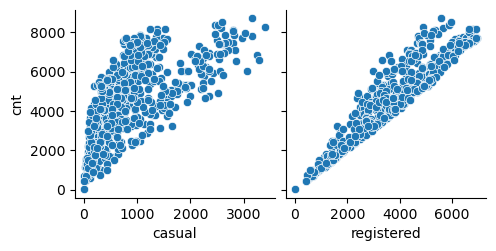

In [4295]:
# Check association between the causual, registered and total count

sns.pairplot(data, x_vars=['casual', 'registered'], y_vars='cnt')
plt.show()

#### Visualise categorial variables with box plots

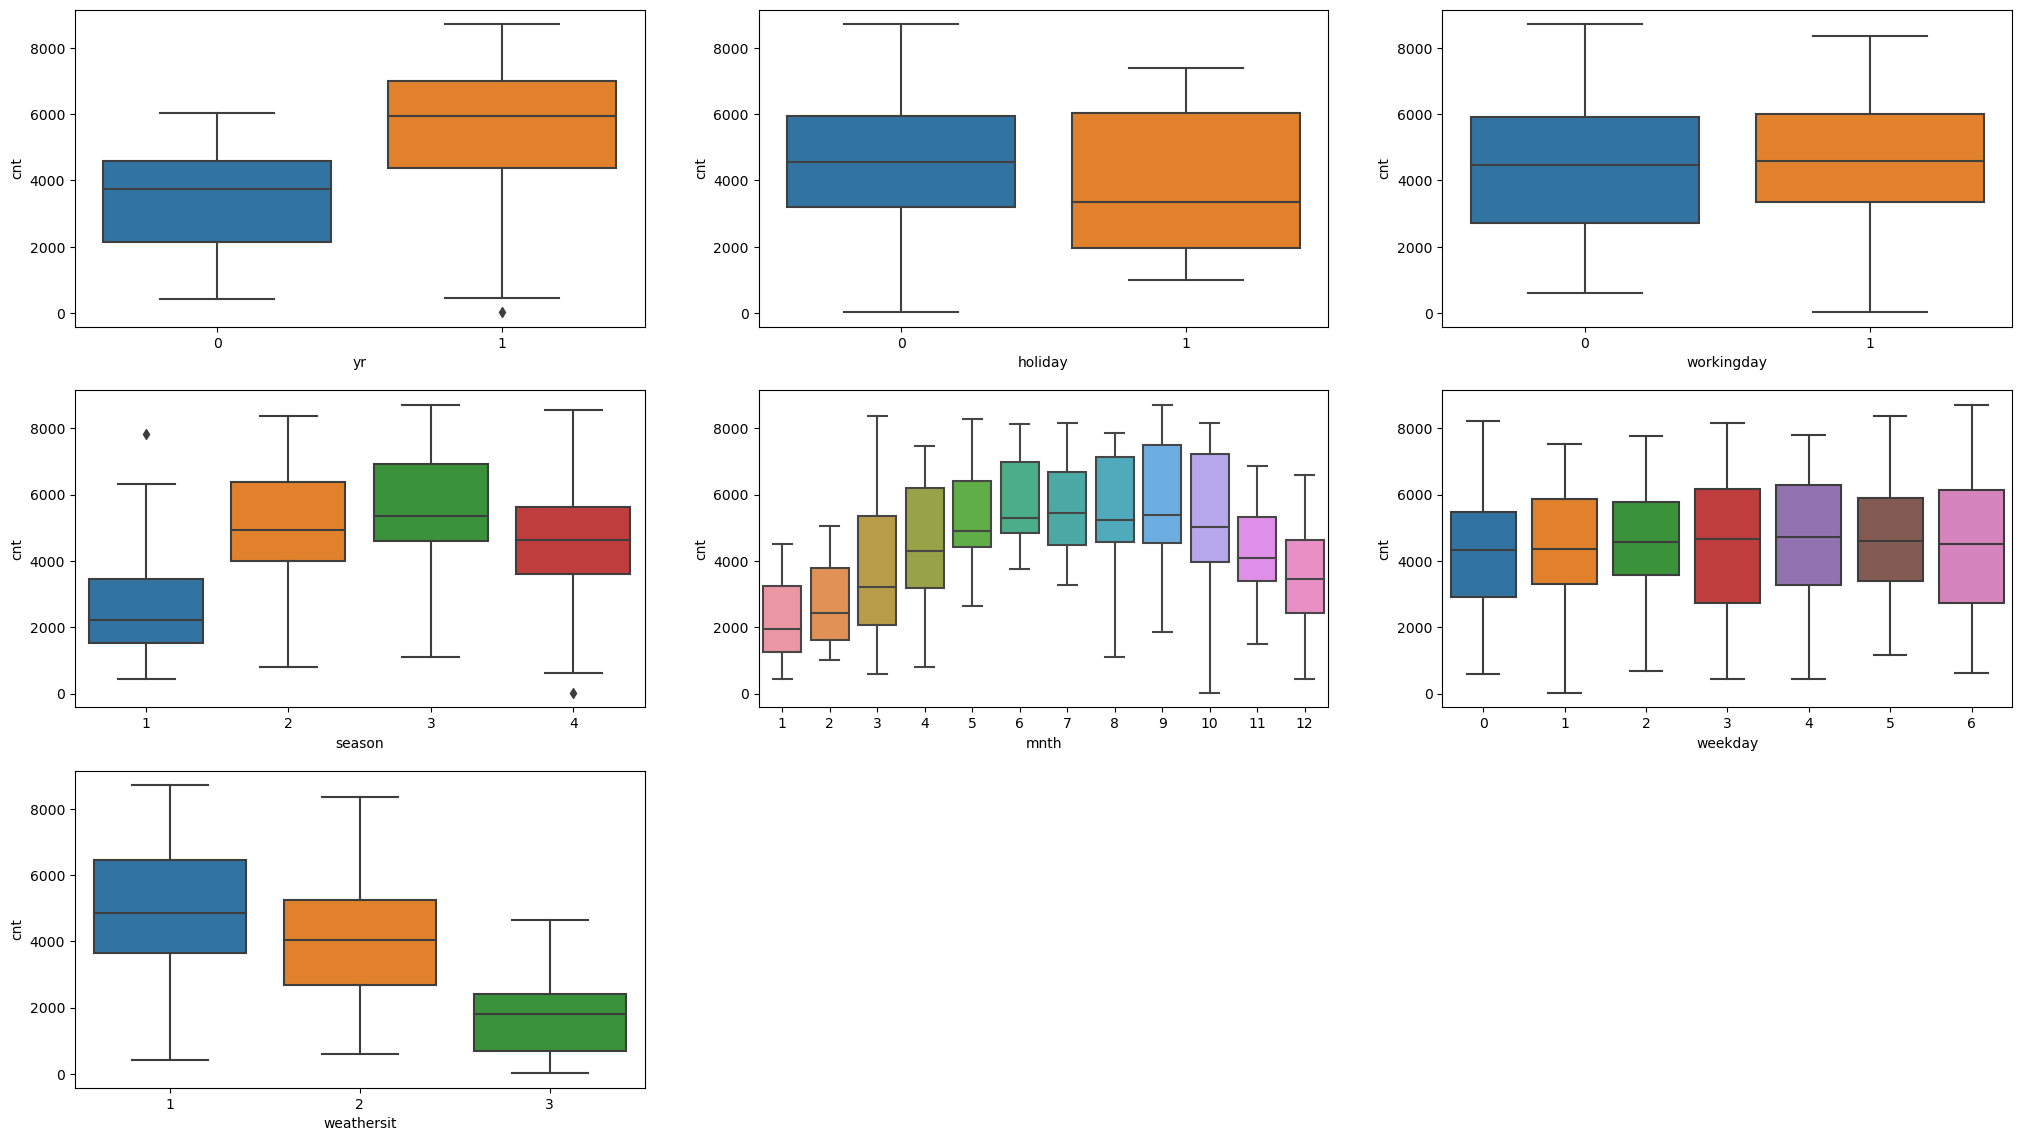

In [4297]:
#Box plot representation

plt.figure(figsize = (25,14))

plt.subplot(3,3,1)
sns.boxplot(data = data, x = 'yr', y = 'cnt')

plt.subplot(3,3,2)
sns.boxplot(data = data, x = 'holiday', y = 'cnt')

plt.subplot(3,3,3)
sns.boxplot(data = data, x = 'workingday', y = 'cnt')

plt.subplot(3,3,4)
sns.boxplot(data = data, x = 'season', y = 'cnt')

plt.subplot(3,3,5)
sns.boxplot(data = data, x = 'mnth', y = 'cnt')

plt.subplot(3,3,6)
sns.boxplot(data = data, x = 'weekday', y = 'cnt')

plt.subplot(3,3,7)
sns.boxplot(data = data, x = 'weathersit', y = 'cnt')

plt.show()

In [4298]:
#Checking for Outliers for season

data[ (data.season == 1) & (data.cnt > 6500) ]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,17-03-2019,1,1,3,0,6,0,2,21.080847,25.2523,75.5833,7.417168,3155,4681,7836


In [4299]:
data[ (data.season == 4) & (data.cnt < 500) ]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,29-10-2019,4,1,10,0,1,1,3,18.04,21.97,88.0,23.9994,2,20,22


#### There are no outliers.

In [4301]:
data1 = data[['holiday','workingday', 'yr', 'temp','atemp','hum','windspeed','casual','registered','cnt']]

In [4302]:
data_corr = data1.corr()

In [4303]:
data_corr

,holiday,workingday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,1.000000,-0.252948,0.008195,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.252948,1.000000,-0.002945,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
yr,0.008195,-0.002945,1.000000,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
temp,-0.028764,0.053470,0.048789,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,-0.032703,0.052940,0.047215,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.015662,0.023202,-0.112547,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,0.006257,-0.018666,-0.011624,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.054055,-0.517607,0.250502,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,-0.109142,0.305437,0.596911,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,-0.068764,0.062542,0.569728,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


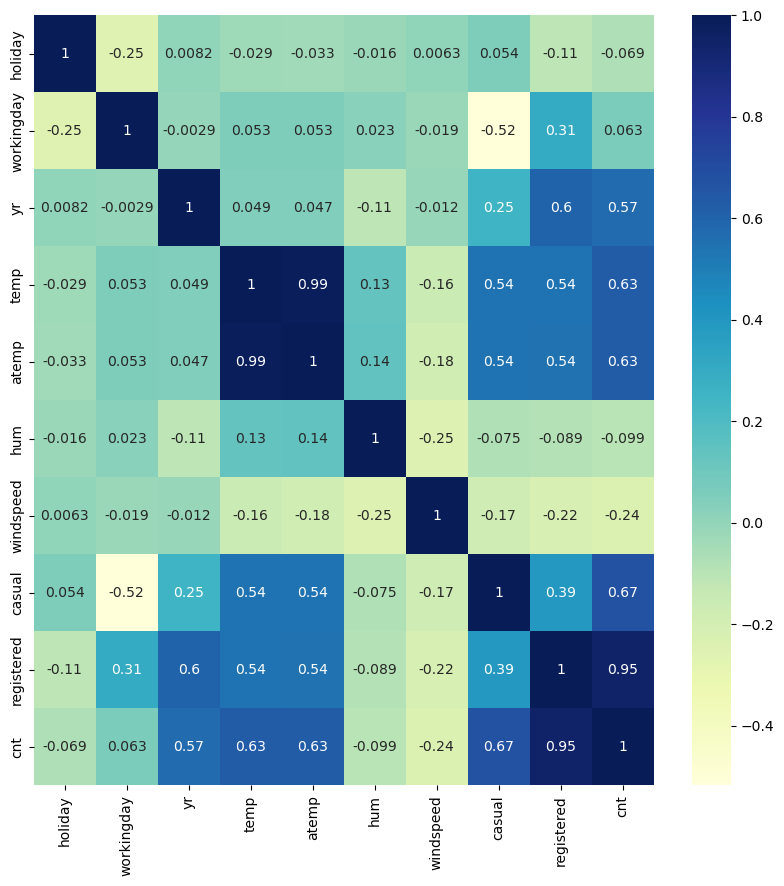

In [4304]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap="YlGnBu")
plt.show()

### CONCLUSIONS FOR DATA VISUALISATION

#### temp / atemp are highly correlated to cnt
#### temp and atemp are highly correlated
#### No outliers
#### We can drop atemp and use temp as a predictor variable


### STEP 3) DATA PREPARATION 

Transform the variables season, mnth, weekday, weathersit

drop the below variables 

instant - This is a just record index which is not needed

casual, registered - Our dependant variable is cnt for this assignment. cnt is the sum of casual and registered. Therefore we can drop these two.

atemp, dteday - can be dropped as well as they are not needed.

In [4307]:
#Categorical variables such as season, weathersit, mnth, weekday have numerical representation without any order
#Replace the numerical values with categorical string values in prepartion for creating dummy variables

data['season'] = data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
data['weathersit'] = data['weathersit'].replace({1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'})
data['mnth'] = data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data['weekday'] = data['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})


In [4308]:
#Now check the values again to ensure the replacement was done correctly
data.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [4309]:
#Notice that there are no records for status 4:heavy_rain which was no demand for bike rental during such weather
data.weathersit.value_counts()

weathersit
clear         463
mist          246
light_snow     21
Name: count, dtype: int64

In [4310]:
#Check the dataset again
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4311]:
#Lets drop the variables that are not predictors
#Drop instant, dteday, casual, registered

data = data.drop( labels=['instant','dteday','casual','registered', 'atemp'], axis=1 )

In [4312]:
#Check the dataset after dropping the variables
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [4313]:
#Create dummy variable for all categorical variables with >2 categories

pd.get_dummies( data, prefix=['season','mnth','wkday','weather'], dtype=int )

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,wkday_Fri,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_clear,weather_light_snow,weather_mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,1,0,...,0,0,0,0,1,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,0,1,0,...,1,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,0,0,1,0,0,0,1,0,0


We just need N-1 columns to represent all the categories.  For example, to represent the season with 4 values, we could use below encoding with just 3 (N-1) dummy variables

000 - represents fall

100 - represents spring

010 - represents summer

001 - represents winter

# In order to avoid perfect multicollinearity between these predictor variables i.e Dummy Variable trap, we need to drop one of the dummy columns. 

Will run the dummy variable creation and drop the first dummy column for each categorical variable with string values


In [4315]:
#Create dummy variables for season variable and drop the first column

data = pd.get_dummies( data, prefix=['season','mnth','wkday','weather'], dtype=int, drop_first=True )
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4316]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'wkday_Mon',
       'wkday_Sat', 'wkday_Sun', 'wkday_Thu', 'wkday_Tue', 'wkday_Wed',
       'weather_light_snow', 'weather_mist'],
      dtype='object')

## STEP 4) SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [4318]:
#Import necessary libraries
from sklearn.model_selection import train_test_split

In [4319]:
#Set the random seed so that we always get same random data set
np.random.seed(0)

#Generate the Traininng and Test Data

data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [4320]:
data_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1


#### Rescaling

Many of the features are of binary values 0 and 1 and it is extremely important to rescale the other continous variables so that we have reliable coefficents.

We can either use MinMaxScaling or Standardisation.

For this assignment, I will be using MinMaxScaling

In [4322]:
#Import necessary libraries for MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

In [4323]:
#Instantiate the MinMaxScaler Object

scaler = MinMaxScaler()

In [4324]:
#Apply MinMaxScaler to all the continous variable and ignore the categorical variables with 0/1

cont_vars = ['temp','hum','windspeed','cnt']
data_train[cont_vars] = scaler.fit_transform(data_train[cont_vars])

In [4325]:
#Display the training data after Scaling
data_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [4326]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


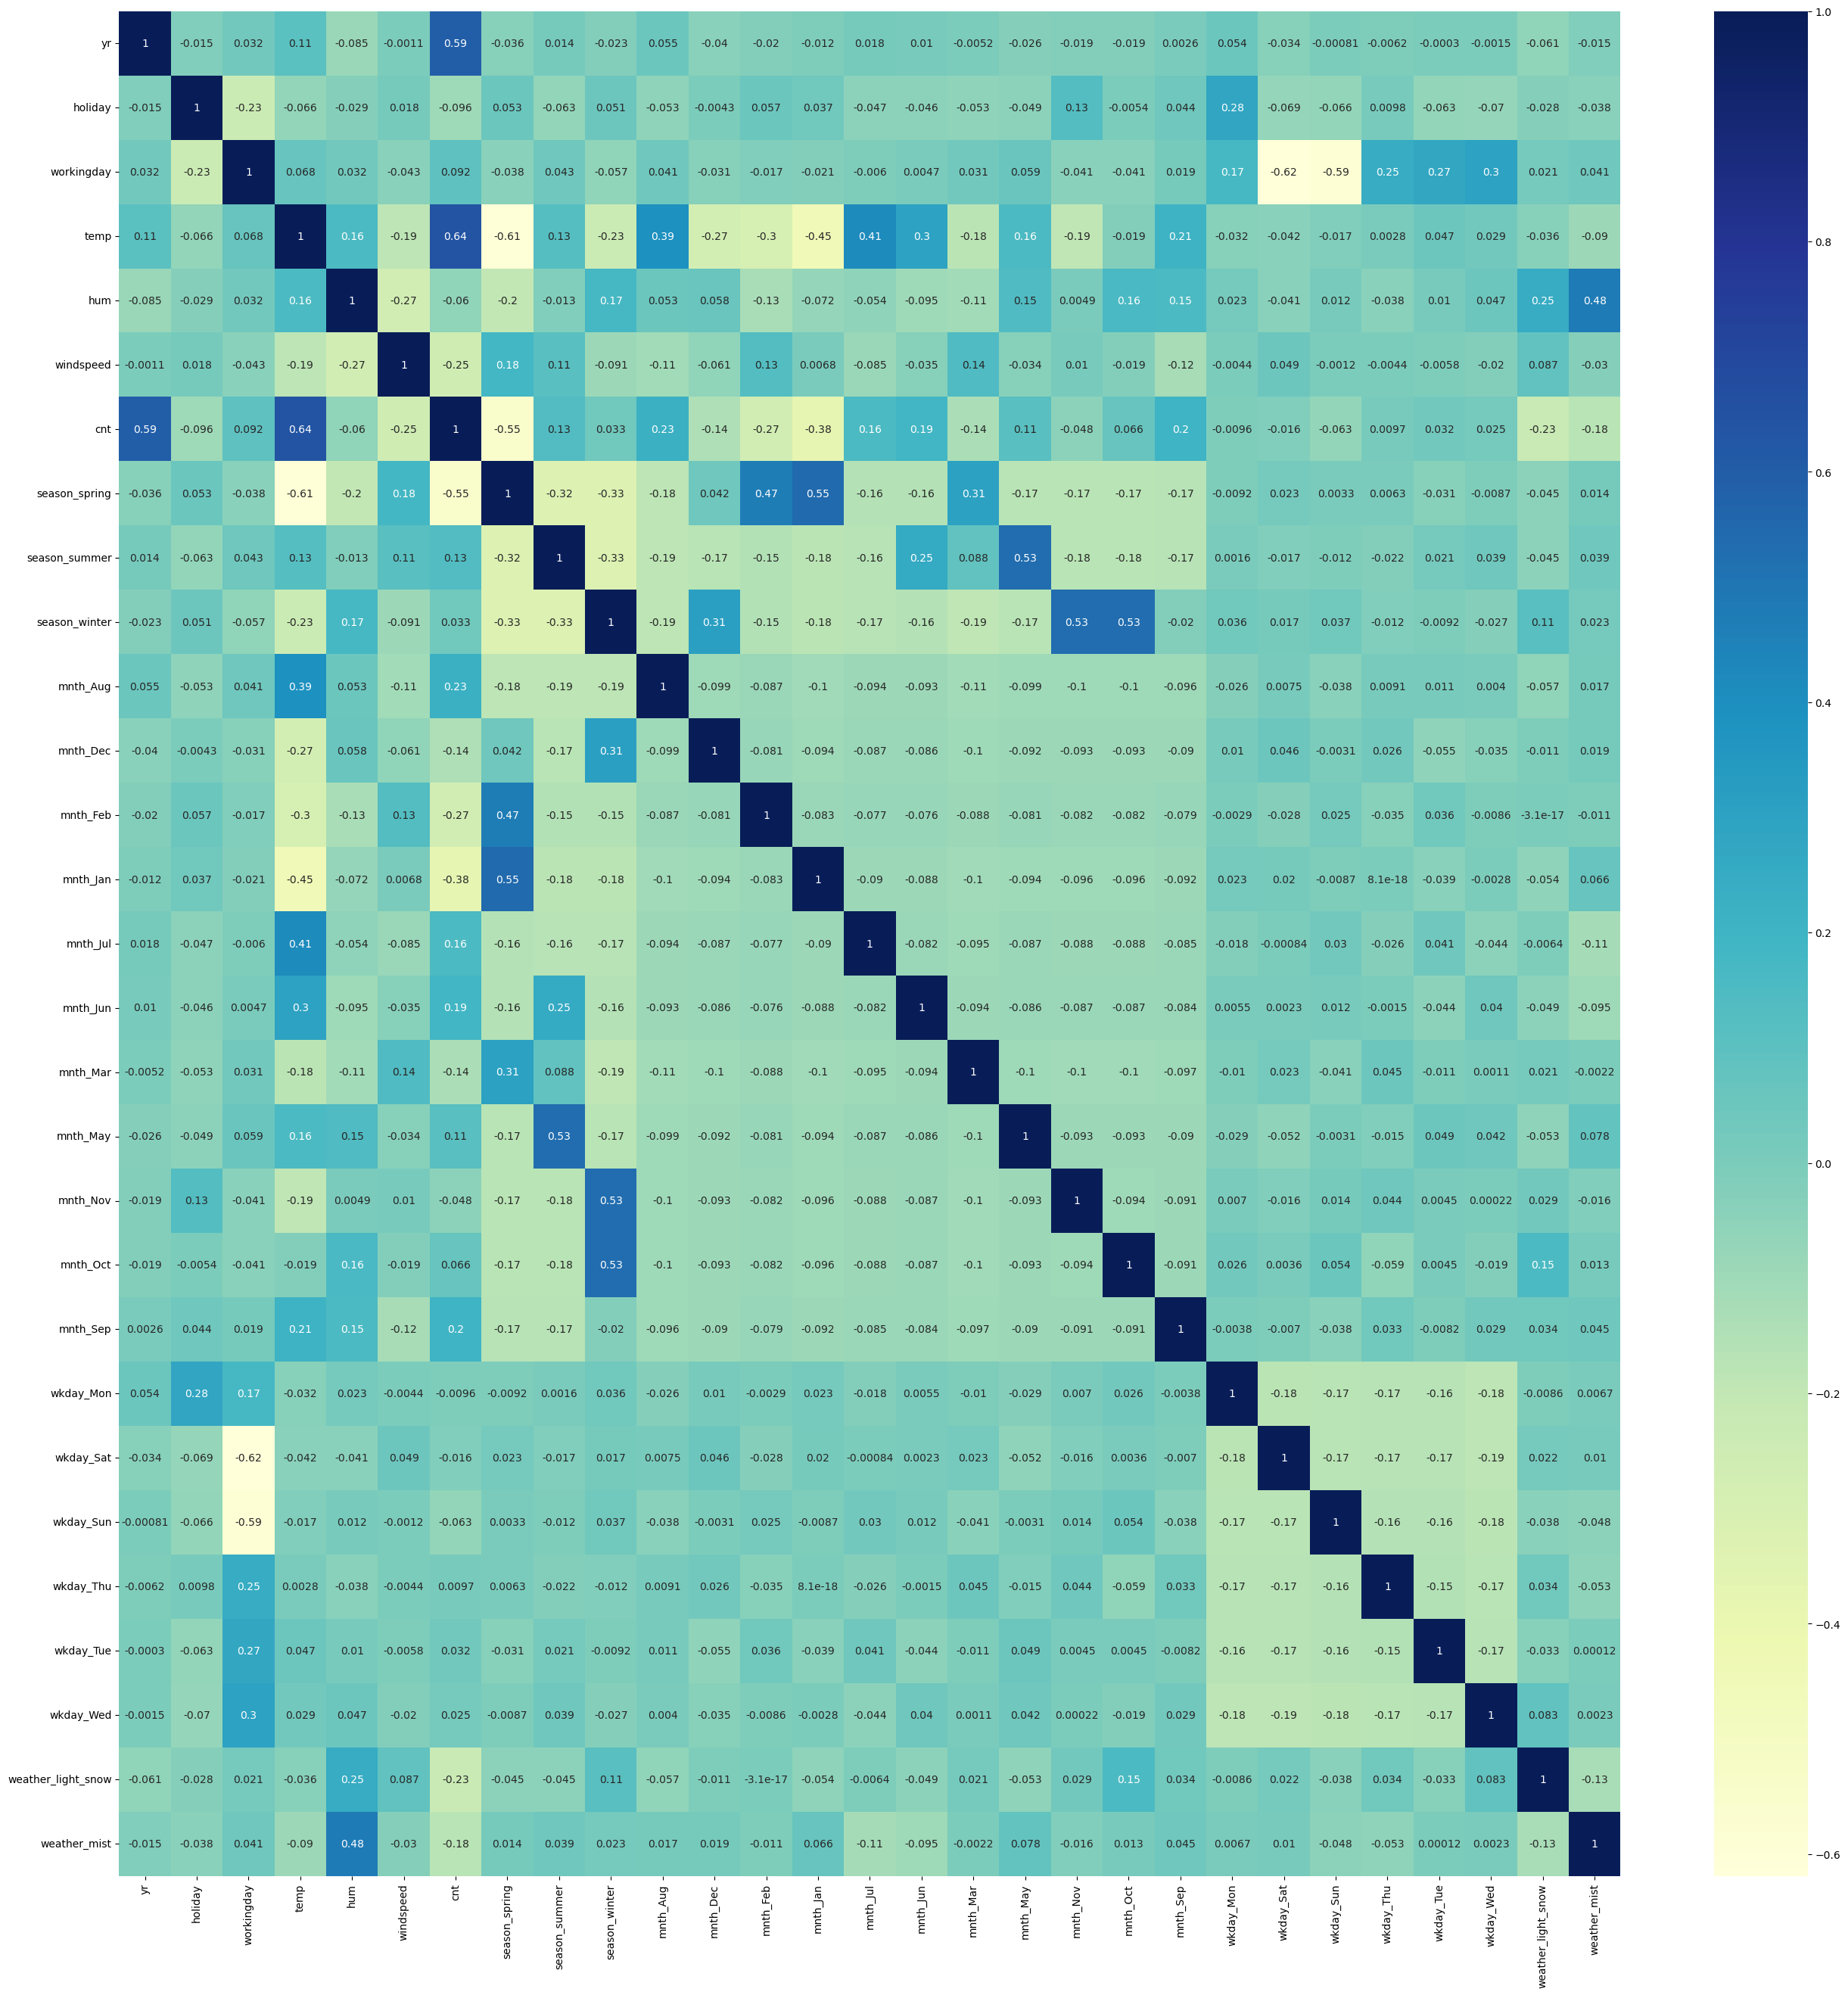

In [4327]:
#Lets Draw a heatmap to check the correlation between different variables

data_train_corr = data_train.corr()

plt.figure(figsize=(32,32))
sns.heatmap(data_train_corr, annot=True, cmap="YlGnBu")
plt.show()

#### predictor variables temp has strong correalation to dependant variable cnt

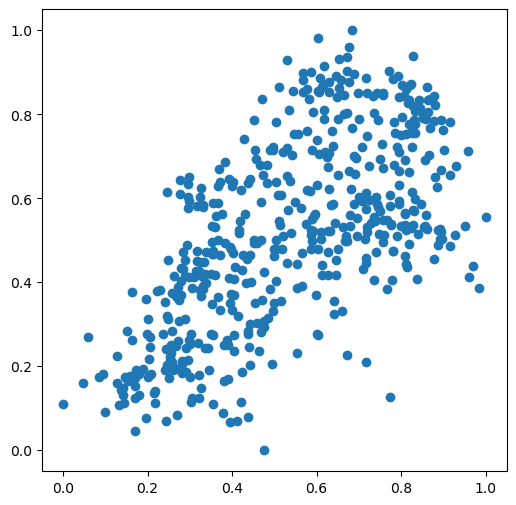

In [4329]:
#Draw a pair plot between temp and cnt

plt.figure(figsize=(6,6))
plt.scatter(data_train.temp, data_train.cnt)
plt.show()

In [4330]:
#Lets divide the training data into predictor and dependant sets

y_data_train = data_train.pop('cnt')

In [4331]:
X_data_train = data_train

### STEP 5) BUILD A LINEAR REGRESSION MODEL

In [4333]:
#Import necessary libraries

import statsmodels.api as sm

In [4334]:
#Add a constant to the training data

X_data_train_lm = sm.add_constant(X_data_train['temp'])

In [4335]:
#Build a regression model

lr = sm.OLS(y_data_train, X_data_train_lm).fit()

In [4336]:
#Check the parameters (B0 and B1) obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

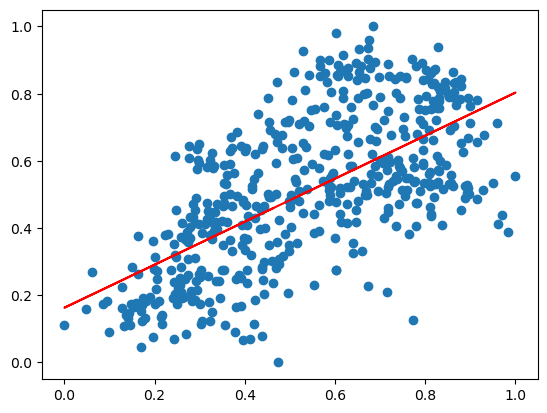

In [4337]:
#Fit a regression Line using the coefficients obtained
# y = B0 + B1*X1
plt.scatter(X_data_train_lm.iloc[:,1], y_data_train)
plt.plot(X_data_train_lm.iloc[:,1], 0.163+0.64*X_data_train_lm.iloc[:,1], 'r')
plt.show()

In [4338]:
#Print a summary of Linear Regression Model

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.80e-61
Time:                        07:28:10   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### p value of temp is zero which means the temp is a significant predictor of bike rentals(cnt).

### R2 is 0.414


In [4340]:
#Lets build the model again with all predictor variables

X_data_train_lm = sm.add_constant(X_data_train)

In [4341]:
#Build a regression model with all predictor variables

lr_1 = sm.OLS(y_data_train, X_data_train_lm).fit()

In [4342]:
#Check the summary
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          8.74e-182
Time:                        07:28:10   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2451      0.035      6.955      0.000       0.176       0.314
yr                     0.2321      0.008     28.820      0.000       0.216       0.248
holiday                0.0100      0.024      0.415      0.678      -0.037       0.057
workingday             0.0969      0.012      7.905      0.000       0.073       0.121
temp                   0.4506      0.046      9.734      0.000       0.360       0.542
hum                   -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed             -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring         -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer          0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter          0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul              -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun              -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May               0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep               0.0811      0.032      2.533      0.012       0.018       0.144
wkday_Mon             -0.0209      0.015     -1.366      0.173      -0.051       0.009
wkday_Sat              0.0964      0.014      7.029      0.000       0.069       0.123
wkday_Sun              0.0419      0.014      3.006      0.003       0.014       0.069
wkday_Thu             -0.0092      0.016     -0.595      0.552      -0.040       0.021
wkday_Tue             -0.0189      0.015     -1.219      0.223      -0.049       0.012
wkday_Wed             -0.0054      0.015     -0.362      0.718      -0.035       0.024
weather_light_snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weather_mist          -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):             

### Analysis for Model with all predictor variables

#### Adjusted  { R }^2 is 0.845 which is really good.

#### There are many predictor variables with high p values which means they are not significant in presence of other predictor variables. 

#### Calculate VIF to check multicollinearity issue

### Checking VIF

Variation Inflation Factor explains how strong the predictor variables are correlated to each other and helps us decide which predictor variables to remove.

Formula for VIF is 

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [4345]:
#Import necessary packages to calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4346]:
#Create a dataframe to have features and the corresponding VIF

vif = pd.DataFrame()
vif['features'] = X_data_train.columns
vif['VIF'] = [variance_inflation_factor(X_data_train,i) for i in range(X_data_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by='VIF', ascending=False)

In [4347]:
#Display the VIF values for each feature
vif

,features,VIF
2,workingday,86.0
21,wkday_Sat,20.0
22,wkday_Sun,18.0
6,season_spring,11.0
8,season_winter,10.0
7,season_summer,8.0
3,temp,7.0
18,mnth_Oct,7.0
17,mnth_Nov,7.0
12,mnth_Jan,6.0


As we can see from above VIF Values, workingday, wkday_Sun, wkday_Sat are highly correlated. There are many other predictors with high VIF Value.

It is a good idea to start using RFE to eliminate the features


### Using RFE to eliminiate the features

In [4350]:
#As there are too many features, lets use Recursive Feature Elimination (RFE)
#Import necessary packages for RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4351]:
#Start RFE

lm = LinearRegression()
lm.fit(X_data_train, y_data_train)

#Run RFE with selected number of features. Since there are 28 features, I will start with 14 features(half of total features) and reiterate with lesser number later
rfe1 = RFE(lm, n_features_to_select=14)
rfe1 = rfe1.fit(X_data_train, y_data_train)

In [4352]:
#List the features selected by RFE

print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False  True False False False
 False  True False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1  7  1  8  4  5  2  1 14 15  6  3 11  1  9  1  1 12
 10 13  1  1]


In [4353]:
list(zip(X_data_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('wkday_Mon', False, 9),
 ('wkday_Sat', True, 1),
 ('wkday_Sun', True, 1),
 ('wkday_Thu', False, 12),
 ('wkday_Tue', False, 10),
 ('wkday_Wed', False, 13),
 ('weather_light_snow', True, 1),
 ('weather_mist', True, 1)]

In [4354]:
#select the features picked by RFE

cols = X_data_train.columns[rfe1.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'wkday_Sat',
       'wkday_Sun', 'weather_light_snow', 'weather_mist'],
      dtype='object')

In [4355]:
#Check the featuers that are not selected by RFE

X_data_train.columns[~rfe1.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'wkday_Mon',
       'wkday_Thu', 'wkday_Tue', 'wkday_Wed'],
      dtype='object')

In [4356]:
#Select the subset of the data based on the features selected by RFE

X_data_train_rfe1 = X_data_train[cols]

X_data_train_rfe1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'wkday_Sat',
       'wkday_Sun', 'weather_light_snow', 'weather_mist'],
      dtype='object')

In [4357]:
#Add constant
X_data_train_rfe1_lm = sm.add_constant(X_data_train_rfe1)

In [4358]:
#Fit the model
lr_rfe1 = sm.OLS(y_data_train, X_data_train_rfe1_lm).fit()

In [4359]:
lr_rfe1.params

const                 0.241820
yr                    0.230747
holiday              -0.008756
workingday            0.094533
temp                  0.478831
hum                  -0.146625
windspeed            -0.168644
season_spring        -0.106709
season_winter         0.057896
mnth_Jul             -0.077874
mnth_Sep              0.059464
wkday_Sat             0.104340
wkday_Sun             0.051703
weather_light_snow   -0.251250
weather_mist         -0.059397
dtype: float64

In [4360]:
lr_rfe1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.81e-190
Time:                        07:28:10   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2418      0.025      9.590      0.000       0.192       0.291
yr                     0.2307      0.008     28.473      0.000       0.215       0.247
holiday               -0.0088      0.021     -0.411      0.681      -0.051       0.033
workingday             0.0945      0.009     10.206      0.000       0.076       0.113
temp                   0.4788      0.031     15.671      0.000       0.419       0.539
hum                   -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed             -0.1686      0.025     -6.622      0.000      -0.219      -0.119
season_spring         -0.1067      0.015     -7.194      0.000      -0.136      -0.078
season_winter          0.0579      0.012      4.712      0.000       0.034       0.082
mnth_Jul              -0.0779      0.017     -4.560      0.000      -0.111      -0.044
mnth_Sep               0.0595      0.015      3.853      0.000       0.029       0.090
wkday_Sat              0.1043      0.011      9.167      0.000       0.082       0.127
wkday_Sun              0.0517      0.012      4.317      0.000       0.028       0.075
weather_light_snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
weather_mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                     2.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Adjusted R2 value is 0.839 which is very good despite dropping half of the predictors. Lets check the VIF of the features again and decide on the next steps

In [4362]:
#Create a dataframe to have features and the corresponding VIF

vif_rfe1 = pd.DataFrame()
vif_rfe1['features'] = X_data_train_rfe1.columns
vif_rfe1['VIF'] = [ variance_inflation_factor(X_data_train_rfe1,i) for i in range( X_data_train_rfe1.shape[1] ) ]
vif_rfe1['VIF'] = round( vif_rfe1['VIF'] )
vif_rfe1 = vif_rfe1.sort_values(by='VIF', ascending=False)
vif_rfe1

,features,VIF
2,workingday,41.0
10,wkday_Sat,10.0
11,wkday_Sun,10.0
1,holiday,3.0
3,temp,3.0
6,season_spring,3.0
4,hum,2.0
7,season_winter,2.0
13,weather_mist,2.0
0,yr,1.0


#### there are variables with > 5 VIF Scores indicating a mulitcollinearity issue.

#### Iterate RFE with selection of 9 features and drop holiday as it has high p value of 0.681

In [4364]:
#Drop the holiday feature to avoid multicollineraity
X_data_train = X_data_train.drop('holiday', axis=1)

In [4365]:
X_data_train

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.605840,0.355596,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
578,1,1,0.863973,0.679690,0.187140,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [4366]:
#Rerun RFE Selection with holiday feature removed and with just 9 features 

lm = LinearRegression()

lm.fit(X_data_train, y_data_train)

rfe2 = RFE(lm, n_features_to_select=9)

rfe2 = rfe2.fit(X_data_train, y_data_train)

In [4367]:
rfe2.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True])

In [4368]:
rfe2.ranking_

array([ 1,  3,  1,  1,  1,  1,  6,  5, 12,  9, 10,  7,  1, 18, 19, 11,  8,
       15,  1, 13,  2,  4, 16, 14, 17,  1,  1])

In [4369]:
#List the feature selection and ranking by RFE
list(zip(X_data_train, rfe2.support_, rfe2.ranking_))

[('yr', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', False, 5),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('wkday_Mon', False, 13),
 ('wkday_Sat', False, 2),
 ('wkday_Sun', False, 4),
 ('wkday_Thu', False, 16),
 ('wkday_Tue', False, 14),
 ('wkday_Wed', False, 17),
 ('weather_light_snow', True, 1),
 ('weather_mist', True, 1)]

In [4370]:
#Capture the features selected by RFE

cols = X_data_train.columns[rfe2.support_]
cols

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul',
       'mnth_Sep', 'weather_light_snow', 'weather_mist'],
      dtype='object')

In [4371]:
#Capture the data based on RFE feature selection

X_data_train_rfe2 = X_data_train[cols]

In [4372]:
#Add constant

X_data_train_rfe2_lm = sm.add_constant(X_data_train_rfe2)

#Fit the model

lr_rfe2 = sm.OLS(y_data_train, X_data_train_rfe2_lm).fit()

In [4373]:
#List the Summary
lr_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.39e-184
Time:                        07:28:10   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3823      0.030     12.642      0.000       0.323       0.442
yr                     0.2327      0.008     27.541      0.000       0.216       0.249
temp                   0.4079      0.027     15.336      0.000       0.356       0.460
hum                   -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed             -0.1789      0.027     -6.742      0.000      -0.231      -0.127
season_spring         -0.1485      0.012    -11.934      0.000      -0.173      -0.124
mnth_Jul              -0.0789      0.018     -4.426      0.000      -0.114      -0.044
mnth_Sep               0.0556      0.016      3.454      0.001       0.024       0.087
weather_light_snow    -0.2386      0.027     -8.702      0.000      -0.292      -0.185
weather_mist          -0.0600      0.011     -5.534      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4374]:
#Check VIF Scores

vif_rfe2 = pd.DataFrame()
vif_rfe2['features'] = X_data_train_rfe2.columns
vif_rfe2['VIF'] = [ variance_inflation_factor(X_data_train_rfe2, i) for i in range(X_data_train_rfe2.shape[1]) ]
vif_rfe2['VIF'] = round(vif_rfe2['VIF'])

In [4375]:
vif_rfe2

,features,VIF
0,yr,2.0
1,temp,12.0
2,hum,15.0
3,windspeed,4.0
4,season_spring,2.0
5,mnth_Jul,1.0
6,mnth_Sep,1.0
7,weather_light_snow,1.0
8,weather_mist,2.0


Adjusted R2 value of 0.825 is still good.

P values indicate that all features are significant. However some features have VIF > 10. 

#### Lets remove the feature 'hum' because it has highest VIF

In [4377]:
#Drop the hum feature
X_data_train = X_data_train.drop('hum', axis=1)

In [4378]:
#Run RFE again

lm = LinearRegression()
lm.fit(X_data_train, y_data_train)

rfe3 = RFE(lm, n_features_to_select=9)
rfe3 = rfe3.fit(X_data_train, y_data_train)

In [4379]:
rfe3.support_

array([ True, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True])

In [4380]:
rfe3.ranking_

array([ 1,  5,  1,  1,  1,  9,  1, 17,  3,  8,  1,  1, 18, 14, 10,  2, 13,
        6, 11,  4,  7, 15, 12, 16,  1,  1])

In [4381]:
#List the feature selected and ranked by RFE

list(zip(X_data_train, rfe3.support_, rfe3.ranking_))

[('yr', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 17),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', False, 6),
 ('wkday_Mon', False, 11),
 ('wkday_Sat', False, 4),
 ('wkday_Sun', False, 7),
 ('wkday_Thu', False, 15),
 ('wkday_Tue', False, 12),
 ('wkday_Wed', False, 16),
 ('weather_light_snow', True, 1),
 ('weather_mist', True, 1)]

In [4382]:
#Capture the names of the features selected by RFE

cols = X_data_train.columns[rfe3.support_]
cols

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'weather_light_snow', 'weather_mist'],
      dtype='object')

In [4383]:
#Create the dataset for features selected by RFE

X_data_train_rfe3 = X_data_train[cols]

In [4384]:
#Fit the model
X_data_train_rfe3_lm = sm.add_constant(X_data_train_rfe3)

lr_rfe3 = sm.OLS(y_data_train, X_data_train_rfe3_lm).fit()

In [4385]:
lr_rfe3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.37e-183
Time:                        07:28:10   Log-Likelihood:                 484.55
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     500   BIC:                            -906.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2626      0.025     10.471      0.000       0.213       0.312
yr                     0.2347      0.008     27.750      0.000       0.218       0.251
temp                   0.4514      0.032     14.243      0.000       0.389       0.514
windspeed             -0.1577      0.026     -6.114      0.000      -0.208      -0.107
season_spring         -0.1055      0.016     -6.574      0.000      -0.137      -0.074
season_winter          0.0397      0.013      3.114      0.002       0.015       0.065
mnth_Jan              -0.0420      0.018     -2.287      0.023      -0.078      -0.006
mnth_Jul              -0.0798      0.018     -4.543      0.000      -0.114      -0.045
weather_light_snow    -0.2786      0.025    -11.002      0.000      -0.328      -0.229
weather_mist          -0.0769      0.009     -8.558      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       67.866   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.317
Skew:                          -0.668   Prob(JB):                     3.13e-39
Kurtosis:                       5.562   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4386]:
#Calculate VIF scores

vif_rfe3 = pd.DataFrame()
vif_rfe3['features'] = X_data_train_rfe3.columns
vif_rfe3['VIF'] = [ variance_inflation_factor(X_data_train_rfe3, i) for i in range(X_data_train_rfe3.shape[1]) ]
vif_rfe3['VIF'] = round( vif_rfe3['VIF'] )
vif_rfe3

,features,VIF
0,yr,2.0
1,temp,4.0
2,windspeed,4.0
3,season_spring,2.0
4,season_winter,1.0
5,mnth_Jan,2.0
6,mnth_Jul,1.0
7,weather_light_snow,1.0
8,weather_mist,2.0


### Conclusions of Model build using RFE

#### We have iterated the model build 3 times using RFE with 14, 9, 9 features respectively eliminating features that are either insignificant / have high VIF value.

#### lr_rfe3 model has Adjusted R2 of 0.823 with p values indicating included features are all significant and VIF score < 5. We can proceed with using this model.

### Complete the Residual Analysis

In [4389]:
#Predict the target variable cnt using the model lr_rfe3

y_data_train_pred = lr_rfe3.predict(X_data_train_rfe3_lm)

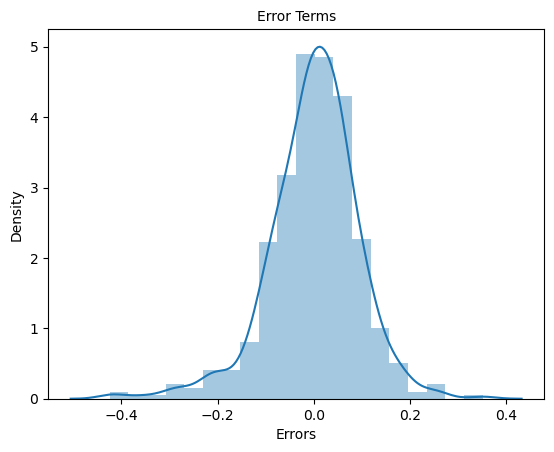

In [4390]:
#Draw a distribution plot of Error terms/Residuals
#calculate the residuals

res = y_data_train - y_data_train_pred
sns.distplot(res, bins=20)
plt.title('Error Terms', fontsize=10)
plt.xlabel('Errors')
plt.show()

#### Residuals are normally distributed and centered around mean of zero.

#### We can rely on this model (lr_rfe3) for further testing with test data

In [4392]:
#Scaling the test data

cont_vars = ['temp','hum','windspeed','cnt']
data_test[cont_vars] = scaler.transform(data_test[cont_vars])

In [4393]:
data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,wkday_Mon,wkday_Sat,wkday_Sun,wkday_Thu,wkday_Tue,wkday_Wed,weather_light_snow,weather_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4394]:
#Split the data into X and Y test after scaling

y_data_test = data_test.pop('cnt')

#Drop the features holiday and hum as we haven't used them in the model.

X_data_test = data_test.drop(['holiday','hum'], axis=1)


In [4395]:
#Create a data frame with features used in the final training model lr_rfe3

model_cols = X_data_train_rfe3.columns
X_data_test_rfe3 = X_data_test[model_cols]

In [4396]:
# Add a constant to the trainining set
X_data_test_rfe3_lm = sm.add_constant(X_data_test_rfe3)

#Predict the cnt using the final model lr_rfe3 and X_data_test

y_data_test_pred = lr_rfe3.predict(X_data_test_rfe3_lm)

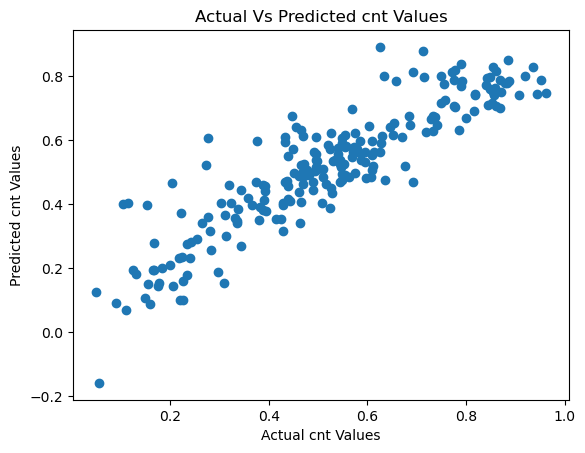

In [4397]:
#Lets plot Actual vs Predicted values using test data

plt.scatter(y_data_test, y_data_test_pred)
plt.title('Actual Vs Predicted cnt Values')
plt.xlabel('Actual cnt Values')
plt.ylabel('Predicted cnt Values')
plt.show()

In [4398]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_data_test, y_data_test_pred)

0.8007290589896194